<a href="https://colab.research.google.com/github/huy19146341/PROJECT_CUOIKY_AI/blob/main/Project_cuoiky_NhanDangBenhTatThanhLong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


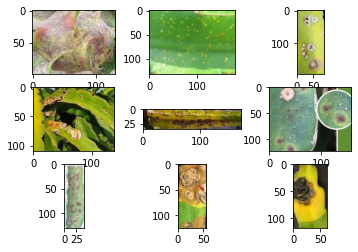

In [2]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/DaTa_AI/thanhlong01/domnau01/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'domnau'+str(i+1)+'.jpeg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [3]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/DaTa_AI/thanhlong01/domnau01/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith(''):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
    

folder = '/content/drive/MyDrive/DaTa_AI/thanhlong01/namcanh01/'
for file in listdir(folder):
  if file.startswith(''):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)
    

folder = '/content/drive/MyDrive/DaTa_AI/thanhlong01/thoidaucanh01/'
for file in listdir(folder):
  if file.startswith(''):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)


photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('TraiCay_photos.npy', photos)
save('Traicay_labels.npy', labels)




(576, 200, 200, 3) (576,)


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
history = model.fit(photos, labels, epochs=100, verbose=1)

Epoch 1/100
18/18 [==============================] - 12s 46ms/step - loss: 766.5102 - accuracy: 0.7292
Epoch 2/100
18/18 [==============================] - 1s 46ms/step - loss: 18.3141 - accuracy: 0.9427
Epoch 3/100
18/18 [==============================] - 1s 45ms/step - loss: 1.8616 - accuracy: 0.9688
Epoch 4/100
18/18 [==============================] - 1s 45ms/step - loss: 0.6162 - accuracy: 0.9913
Epoch 5/100
18/18 [==============================] - 1s 45ms/step - loss: 0.0727 - accuracy: 0.9965
Epoch 6/100
18/18 [==============================] - 1s 45ms/step - loss: 0.0458 - accuracy: 0.9965
Epoch 7/100
18/18 [==============================] - 1s 45ms/step - loss: 8.2989e-08 - accuracy: 1.0000
Epoch 8/100
18/18 [==============================] - 1s 45ms/step - loss: 1.5254e-05 - accuracy: 1.0000
Epoch 9/100
18/18 [==============================] - 1s 44ms/step - loss: 1.1453e-05 - accuracy: 1.0000
Epoch 10/100
18/18 [==============================] - 1s 44ms/step - loss: 2.1759e-0

In [7]:
classes = ['Bệnh Đốm Nâu_TắcKè _Nguyên nhân: do nấm Gloeosporium agaves gây hại trong điều kiện ẩm độ cao hoặc nhiều sương mù vào sáng sớm tạo điều kiện cho bệnh phát triển nhanh.Bệnh gây hại cả trên thân và quả thanh long Bệnh gây hại làm cho cành thanh long bị sần sùi, gây thối khô từng mảng.Trênquả, những đốm vàng làm cho quả trở nên sần sùi thối khô làm ảnh hưởng nghiêm trọng đến giá trị thương phẩm',
'Bệnh nám cành_Nguyên nhân:  bệnh xuất hiện vào màu nắng trong điều kiện thời tiết thất thường. Nắng làm bỏng mô cây tạo điều kiện cho nấm Macssonina agaves Syd và Sphaceloma sp tấn công và phát triển. Vết bệnh đầu tiên là vết cháy nắng sau đó tại chỗ cháy nắng có một màng mỏng màu xám tro, nhám do nấm lớp mốc phát triển.',
 'Bệnh thối đầu cành_Nguyên nhân: do nấm Alternaria sp gây ra, bệnh thường phát sinh vào đầu mùa mưa. Các cành trên cùng của trụ sẽ chuyển sang màu vàng và vết bệnh xuất hiện, phát sinh mạnh ở các cành phía Tây, cành bị khuất gió. Bệnh làm cho ngọn cành thanh long bị bệnh chuyển thành màu vàng, mềm ra, sau đó bị thối nhũn.Cây bị bệnh sẽ phát triển chậm, cành giảm cây mất khả năng cho trái. Nếu bệnh nặng cây sẽ chết ngọn và hoàn toàn không phát triển được nữa. Nếu không có biện pháp xử lý kịp thời thì sẽ ảnh hưởng lớn về cả năng suất lẫn chất lượng trái.']

In [ ]:
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import load_img,img_to_array
model.save('/content/drive/MyDrive/DaTa_AI/thanhlong01/model_thanhlong2.h')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/DaTa_AI/thanhlong01/model_thanhlong2.h/assets


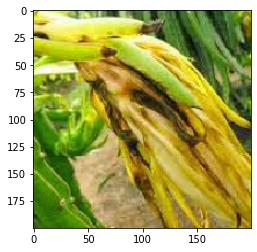

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('thoidaucanh14.jpeg', target_size=(200,200))  
plt.imshow(img)

In [10]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
#print(output)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.13203867 0.09267232 0.45839438 0.02716801 0.0621502  0.01926027
  0.05935349 0.00367325 0.08420917 0.06108022]]


'Bệnh thối đầu cành_Nguyên nhân: do nấm Alternaria sp gây ra, bệnh thường phát sinh vào đầu mùa mưa. Các cành trên cùng của trụ sẽ chuyển sang màu vàng và vết bệnh xuất hiện, phát sinh mạnh ở các cành phía Tây, cành bị khuất gió. Bệnh làm cho ngọn cành thanh long bị bệnh chuyển thành màu vàng, mềm ra, sau đó bị thối nhũn.Cây bị bệnh sẽ phát triển chậm, cành giảm cây mất khả năng cho trái. Nếu bệnh nặng cây sẽ chết ngọn và hoàn toàn không phát triển được nữa. Nếu không có biện pháp xử lý kịp thời thì sẽ ảnh hưởng lớn về cả năng suất lẫn chất lượng trái.'

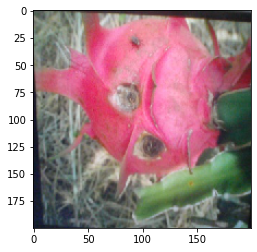

In [16]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('/content/drive/MyDrive/DaTa_AI/thanhlong01/domnau01/12.jpg', target_size=(200,200))
plt.imshow(img)

In [17]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
#print(output)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.44837958 0.04763675 0.11795545 0.07201002 0.0431821  0.02318554
  0.03327157 0.01071826 0.06644537 0.13721527]]


'Bệnh Đốm Nâu_TắcKè _Nguyên nhân: do nấm Gloeosporium agaves gây hại trong điều kiện ẩm độ cao hoặc nhiều sương mù vào sáng sớm tạo điều kiện cho bệnh phát triển nhanh.Bệnh gây hại cả trên thân và quả thanh long Bệnh gây hại làm cho cành thanh long bị sần sùi, gây thối khô từng mảng.Trênquả, những đốm vàng làm cho quả trở nên sần sùi thối khô làm ảnh hưởng nghiêm trọng đến giá trị thương phẩm'

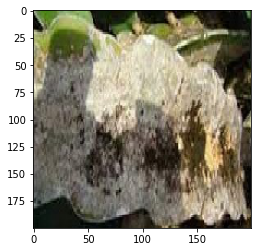

In [18]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('/content/drive/MyDrive/DaTa_AI/thanhlong01/namcanh01/namcanh2.jpeg', target_size=(200,200))
plt.imshow(img)

In [19]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.07016224 0.5346693  0.08936846 0.02403    0.05011665 0.01023062
  0.04629083 0.00386038 0.13031882 0.04095273]]


'Bệnh nám cành_Nguyên nhân:  bệnh xuất hiện vào màu nắng trong điều kiện thời tiết thất thường. Nắng làm bỏng mô cây tạo điều kiện cho nấm Macssonina agaves Syd và Sphaceloma sp tấn công và phát triển. Vết bệnh đầu tiên là vết cháy nắng sau đó tại chỗ cháy nắng có một màng mỏng màu xám tro, nhám do nấm lớp mốc phát triển.'

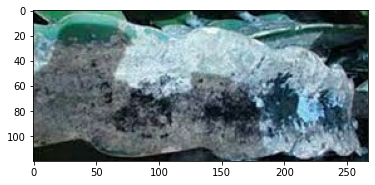

In [20]:
import cv2
img = cv2.imread(r'/content/drive/MyDrive/DaTa_AI/thanhlong01/namcanh01/namcanh2.jpeg')
plt.imshow(img)

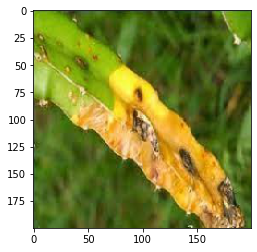

In [21]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('/content/drive/MyDrive/DaTa_AI/thanhlong01/thoidaucanh01/thoidaucanh7.jpeg', target_size=(200,200))  
plt.imshow(img)

In [22]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.14289309 0.12007584 0.2894934  0.04849271 0.07829373 0.03566546
  0.07715254 0.01162644 0.10777331 0.08853344]]


'Bệnh thối đầu cành_Nguyên nhân: do nấm Alternaria sp gây ra, bệnh thường phát sinh vào đầu mùa mưa. Các cành trên cùng của trụ sẽ chuyển sang màu vàng và vết bệnh xuất hiện, phát sinh mạnh ở các cành phía Tây, cành bị khuất gió. Bệnh làm cho ngọn cành thanh long bị bệnh chuyển thành màu vàng, mềm ra, sau đó bị thối nhũn.Cây bị bệnh sẽ phát triển chậm, cành giảm cây mất khả năng cho trái. Nếu bệnh nặng cây sẽ chết ngọn và hoàn toàn không phát triển được nữa. Nếu không có biện pháp xử lý kịp thời thì sẽ ảnh hưởng lớn về cả năng suất lẫn chất lượng trái.'